In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
path = "/content/drive/MyDrive/DS Lab/archive/zomato.csv"
df = pd.read_csv(path)

**EDA**

In [3]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [5]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [6]:
df = df.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type','listed_in(city)':'city'})
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

In [7]:
df=df.drop(['url','dish_liked','phone'],axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   address       51717 non-null  object
 1   name          51717 non-null  object
 2   online_order  51717 non-null  object
 3   book_table    51717 non-null  object
 4   rate          43942 non-null  object
 5   votes         51717 non-null  int64 
 6   location      51696 non-null  object
 7   rest_type     51490 non-null  object
 8   cuisines      51672 non-null  object
 9   cost          51371 non-null  object
 10  reviews_list  51717 non-null  object
 11  menu_item     51717 non-null  object
 12  type          51717 non-null  object
 13  city          51717 non-null  object
dtypes: int64(1), object(13)
memory usage: 5.5+ MB


In [9]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [10]:
df.isnull().sum()

address            0
name               0
online_order       0
book_table         0
rate            7775
votes              0
location          21
rest_type        227
cuisines          45
cost             346
reviews_list       0
menu_item          0
type               0
city               0
dtype: int64

In [11]:
df.duplicated().sum()

43

In [12]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51674 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   address       51674 non-null  object
 1   name          51674 non-null  object
 2   online_order  51674 non-null  object
 3   book_table    51674 non-null  object
 4   rate          43907 non-null  object
 5   votes         51674 non-null  int64 
 6   location      51653 non-null  object
 7   rest_type     51447 non-null  object
 8   cuisines      51629 non-null  object
 9   cost          51329 non-null  object
 10  reviews_list  51674 non-null  object
 11  menu_item     51674 non-null  object
 12  type          51674 non-null  object
 13  city          51674 non-null  object
dtypes: int64(1), object(13)
memory usage: 5.9+ MB


In [14]:
resname = df["name"].value_counts()
print(resname)

Cafe Coffee Day                                            96
Onesta                                                     85
Just Bake                                                  73
Empire Restaurant                                          71
Five Star Chicken                                          70
                                                           ..
Hyderabadi Biryaani Hub                                     1
Lassi Mania                                                 1
Coastal Biryani Paradise                                    1
Momo Shop                                                   1
Plunge - Sheraton Grand Bengaluru Whitefield Hotel &...     1
Name: name, Length: 8792, dtype: int64


In [15]:
def filter_rows_by_values(df, col, values):
    return df[df[col].isin(values)]
df = filter_rows_by_values(df, "name", ["Cafe Coffee Day","Onesta","Just Bake","Empire Restaurant","Five Star Chicken"])

In [16]:
resname = df["name"].value_counts()
print(resname)

Cafe Coffee Day      96
Onesta               85
Just Bake            73
Empire Restaurant    71
Five Star Chicken    70
Name: name, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9e9e00f310>]],
      dtype=object)

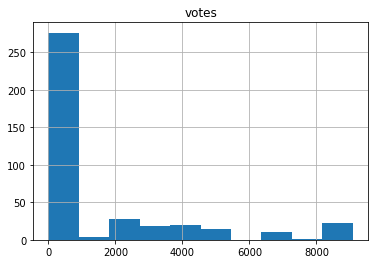

In [17]:
df.hist()

In [18]:
df = df.loc[df['rate'] != 'NEW']
df = df.loc[df['rate'] != '-']

In [19]:
df['rate'] = df['rate'].apply(lambda x: str(x).replace('/5', ''))

In [20]:
df['rate'] = df['rate'].astype('float')

In [21]:
df['rate'] = df['rate'].fillna(df['rate'].mean())

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


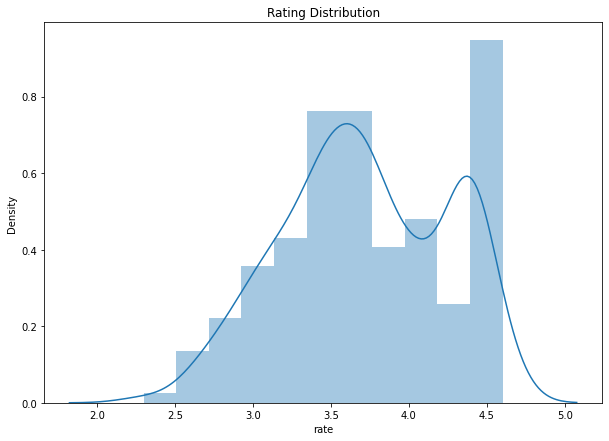

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,7))
sns.distplot(df['rate'])
plt.title('Rating Distribution')
plt.show()

In [23]:
df['cost'] = df['cost'].apply(lambda x: str(x).replace(',', ''))

In [24]:
df['cost'] = df['cost'].astype(float)

In [25]:
df['cost'] = df['cost'].fillna(df['cost'].mean())
df['cost'].isna().sum()

0

In [26]:
import numpy as np
df['cost'] = np.log(df['cost'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


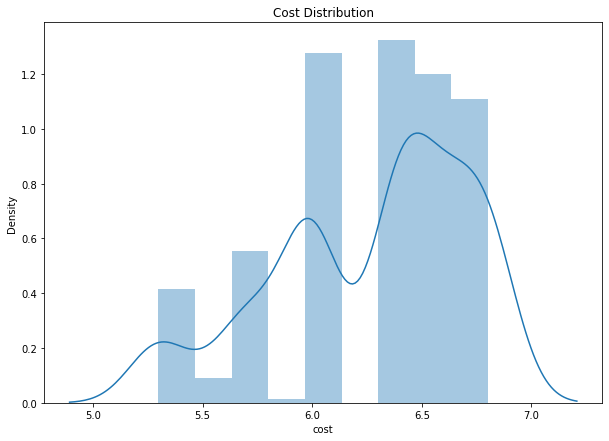

In [27]:
plt.figure(figsize=(10,7))
sns.distplot(df['cost'])
plt.title('Cost Distribution')
plt.show()

In [28]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'object']
num_features

['rate', 'votes', 'cost']

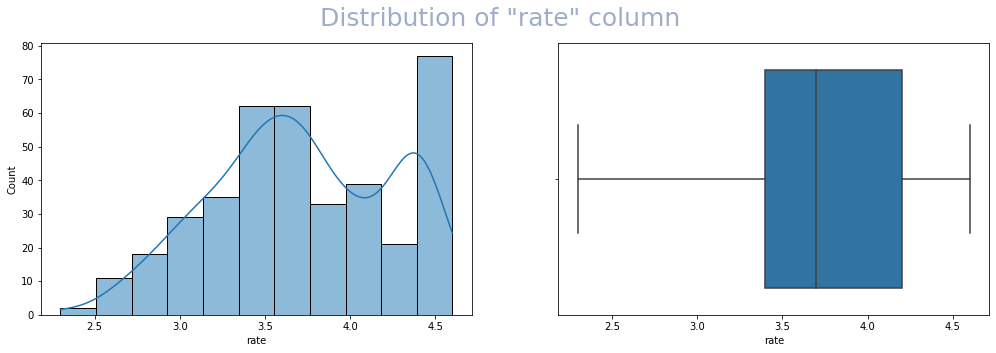

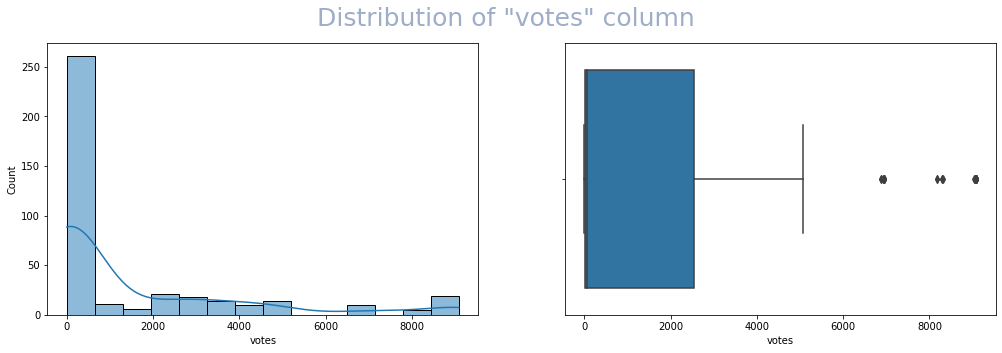

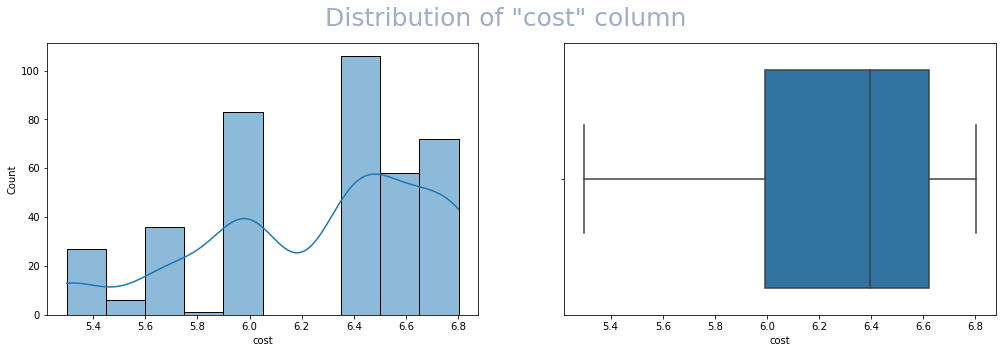

In [29]:
font_titles = {'family': 'self-serif',
               'color':  "#9EADC8",
               'weight': 'bold',
               'size': 25,
               }
for feature in num_features:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 5))
    sns.histplot(x=df[feature], ax=ax1, kde=True)
    sns.boxplot(x=df[feature], ax=ax2)
    plt.suptitle(f'Distribution of "{feature}" column', size=25, fontdict=font_titles)
    plt.show()

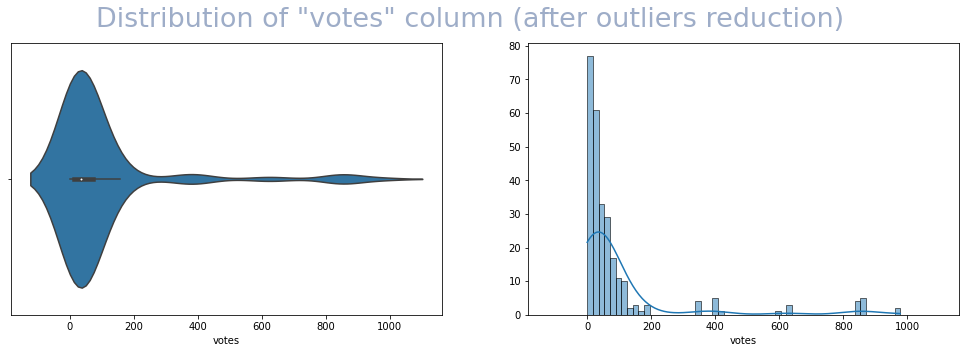

In [30]:
sub_data_votes = df[df['votes']<1500]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 5), sharex=True)
sns.violinplot(x=sub_data_votes['votes'], ax=ax1)
sns.histplot(x=sub_data_votes['votes'], kde=True, ax=ax2)
ax2.set(ylabel=None)
plt.suptitle('Distribution of "votes" column (after outliers reduction)', size=27, fontdict=font_titles)
plt.show()

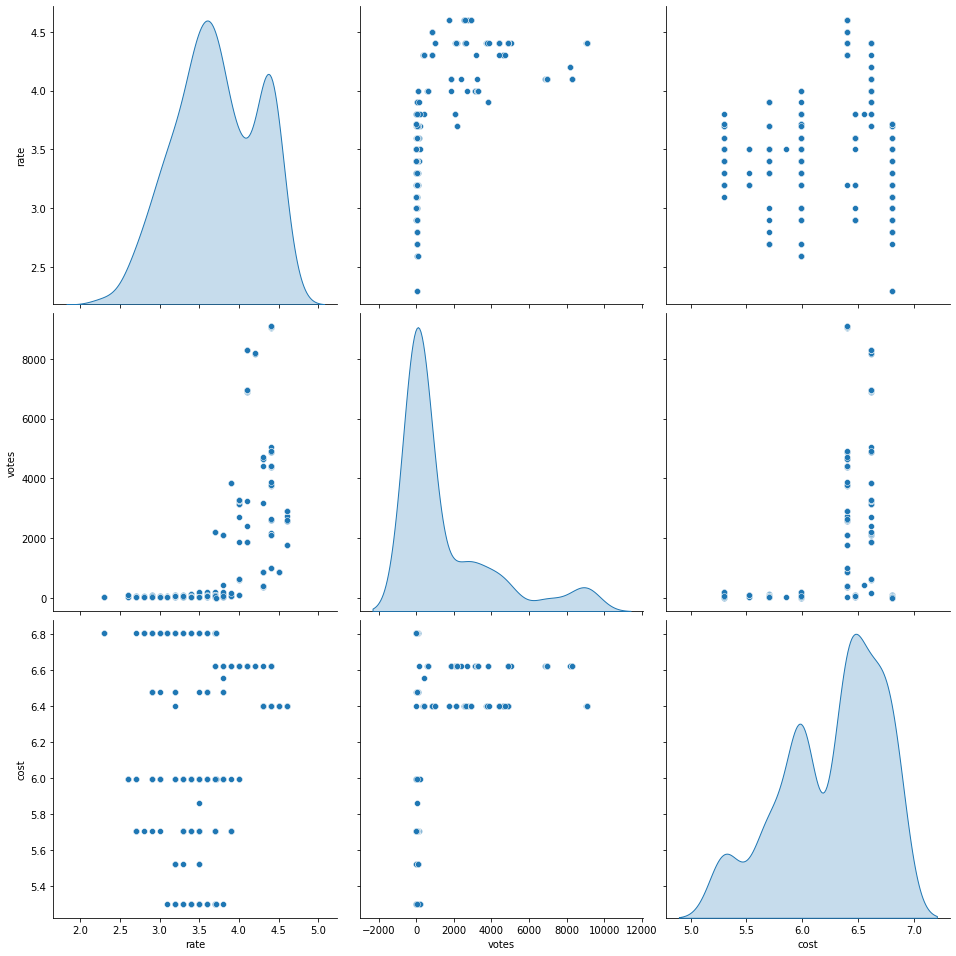

In [31]:
%config InlineBackend.figure_format='png'
sns.pairplot(df[num_features], height=4.5, kind='scatter', diag_kind='kde')

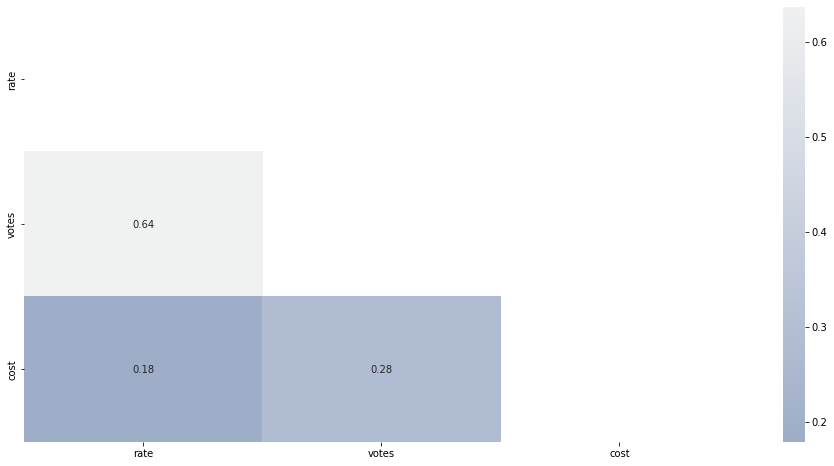

In [32]:
m = df[num_features].corr()
main_cmap = sns.light_palette("#9EADC8", reverse=True, as_cmap=True)
half_mask = np.zeros(m.shape, dtype=bool)
half_mask[np.triu_indices_from(half_mask)]=True
plt.figure(figsize=(16, 8))
sns.heatmap(m, mask=half_mask, annot=True, cmap=main_cmap)

In [33]:
df.head(10)

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
7,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,Yes,Yes,4.600000,2556,Banashankari,"Casual Dining, Cafe","Pizza, Cafe, Italian",6.396930,"[('Rated 5.0', 'RATED\n I personally really l...",[],Cafes,Banashankari
22,"SRF Complex, Near BDA Complex, Kathreguppe Mai...",Cafe Coffee Day,No,No,3.600000,28,Banashankari,Cafe,"Cafe, Fast Food",6.802395,"[('Rated 4.0', 'RATED\n This outlet is better...",[],Cafes,Banashankari
38,"4, Opposite NMKRV College, 21st C Cross Road, ...",Empire Restaurant,Yes,No,4.400000,4884,Jayanagar,Casual Dining,"North Indian, Mughlai, South Indian, Chinese",6.620073,"[('Rated 3.0', 'RATED\n Grill and tandoori is...",[],Delivery,Banashankari
44,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,Yes,Yes,4.600000,2556,Banashankari,"Casual Dining, Cafe","Pizza, Cafe, Italian",6.396930,"[('Rated 5.0', 'RATED\n I personally really l...",[],Delivery,Banashankari
58,"484/A, 1st Stage, 2nd Block, 4th Main Rd, SBM ...",Five Star Chicken,No,No,3.600000,55,Banashankari,Quick Bites,"Fast Food, Burger",5.298317,"[('Rated 1.0', ""RATED\n Third class fraudulen...",[],Delivery,Banashankari
112,"3967, VHBC Society, Girinagar Phase 4, Hoseker...",Just Bake,No,No,3.400000,8,Banashankari,Bakery,"Bakery, Desserts",5.991465,[],[],Delivery,Banashankari
254,"28th Main, 8th Block, Jayanagar, Bangalore",Cafe Coffee Day,Yes,No,3.200000,17,Jayanagar,Cafe,"Cafe, Fast Food",6.802395,"[('Rated 5.0', 'RATED\n Delicious mouthwateri...",[],Delivery,Banashankari
522,"3967, VHBC Society, Girinagar Phase 4, Hoseker...",Just Bake,No,No,3.400000,8,Banashankari,Bakery,"Bakery, Desserts",5.991465,[],[],Desserts,Banashankari
557,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,Yes,Yes,4.600000,2556,Banashankari,"Casual Dining, Cafe","Pizza, Cafe, Italian",6.396930,"[('Rated 5.0', 'RATED\n I personally really l...",[],Dine-out,Banashankari
625,"21st Main Road, Next to Deva Gowda Petrol Pump...",Cafe Coffee Day,No,No,3.717867,0,Banashankari,Cafe,"Cafe, Fast Food",6.802395,"[('Rated 4.0', 'RATED\n Had ordered devil?s o...",[],Dine-out,Banashankari


In [34]:
df.shape

(389, 14)

In [35]:
all_ratings = []
from tqdm import tqdm
import re
for name,ratings in tqdm(zip(df['name'],df['reviews_list'])):
    ratings = eval(ratings)
    for score, doc in ratings:
        if score:
            score = score.strip("Rated").strip()
            doc = doc.strip('RATED').strip()
            score = float(score)
            all_ratings.append([name,score, doc])
rating_df=pd.DataFrame(all_ratings,columns=['name','rating','review'])
rating_df['review']=rating_df['review'].apply(lambda x : re.sub('[^a-zA-Z0-9\s]',"",x))
rating_df.to_csv("Ratings.csv")
rating_df.head(10)

389it [00:00, 1438.70it/s]


,name,rating,review
0,Onesta,5.0,I personally really liked this place The ambi...
1,Onesta,5.0,Very good pizza took unlimited pizza and could...
2,Onesta,4.0,Onward has been a favourite place for a Pizza ...
3,Onesta,3.0,Onesta serves unlimited pizza and desserts wit...
4,Onesta,4.0,I like going back to this place I really like ...
5,Onesta,5.0,Bakasuras Paradise\n\nThe only place that can ...
6,Onesta,4.0,It is like any other onesta outlet But I find ...
7,Onesta,5.0,At times of a cafe bubble in Bangalore Onesta ...
8,Onesta,5.0,This is one of the biggest Onesta outlets Ive ...
9,Onesta,5.0,This roof top outlet of Onest is one of the a...


In [36]:
df.shape

(389, 14)

In [37]:
rating_df.shape

(16299, 3)

In [38]:
rating_df.to_csv('/content/drive/MyDrive/DS Lab/archive/zomato_rating_1.csv')

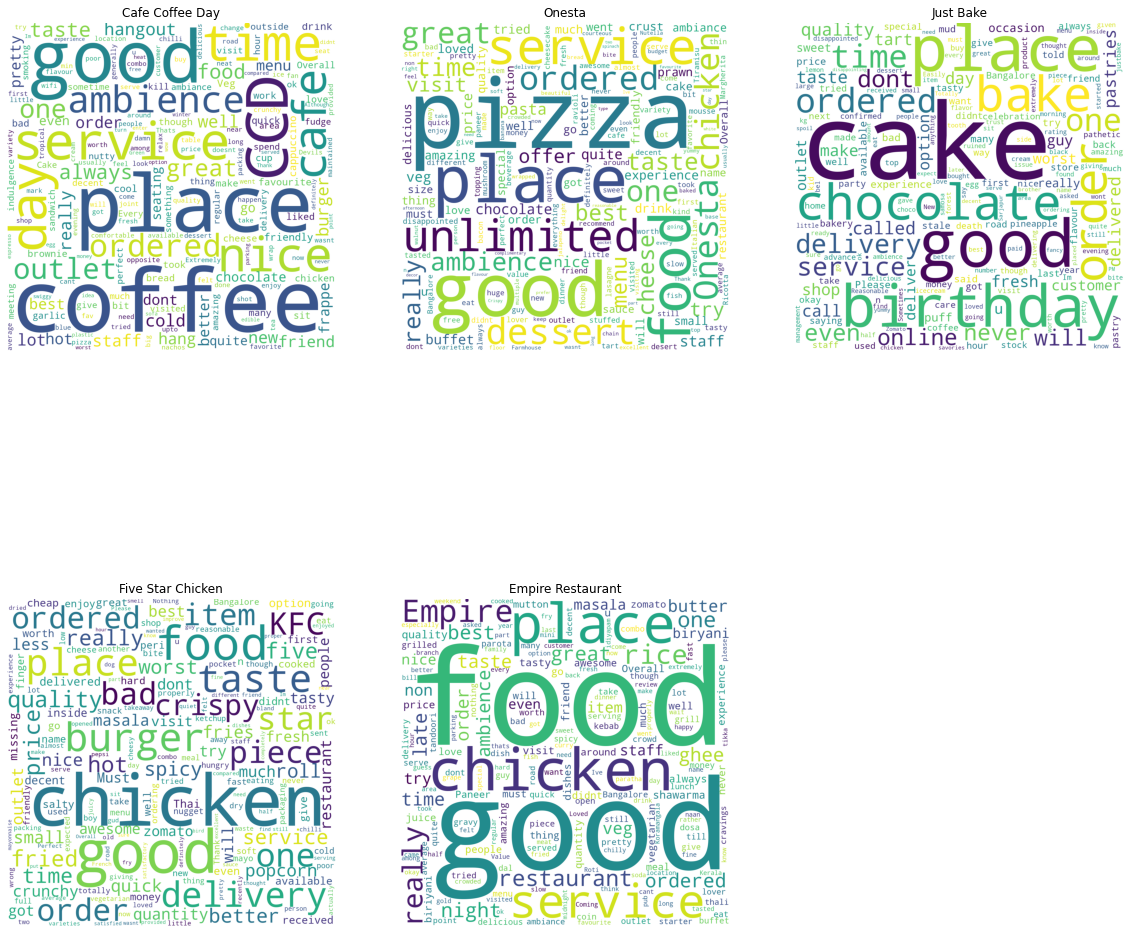

In [39]:
from wordcloud import WordCloud
rest=df['name'].value_counts()[:9].index
def produce_wordcloud(rest):
    plt.figure(figsize=(20,30))
    for i,r in enumerate(rest):
        plt.subplot(3,3,i+1)
        corpus=rating_df[rating_df['name']==r]['review'].values.tolist()
        corpus=' '.join(x  for x in corpus)
        wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1500, height=1500).generate(corpus)
        plt.imshow(wordcloud)
        plt.title(r)
        plt.axis("off")
produce_wordcloud(rest)

Text(0, 0.5, 'count')

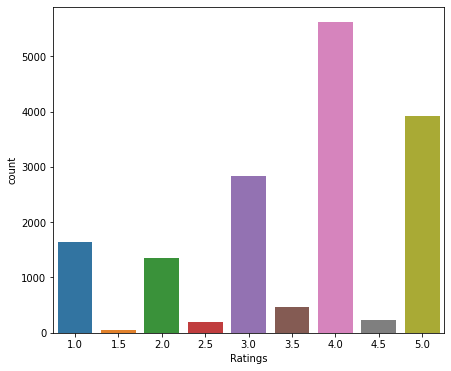

In [40]:
plt.figure(figsize=(7,6))
rating=rating_df['rating'].value_counts()
sns.barplot(x=rating.index,y=rating)
plt.xlabel("Ratings")
plt.ylabel('count')

In [41]:
df.shape

(389, 14)

**NLP and GENSIM TOPIC MODELLING**

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


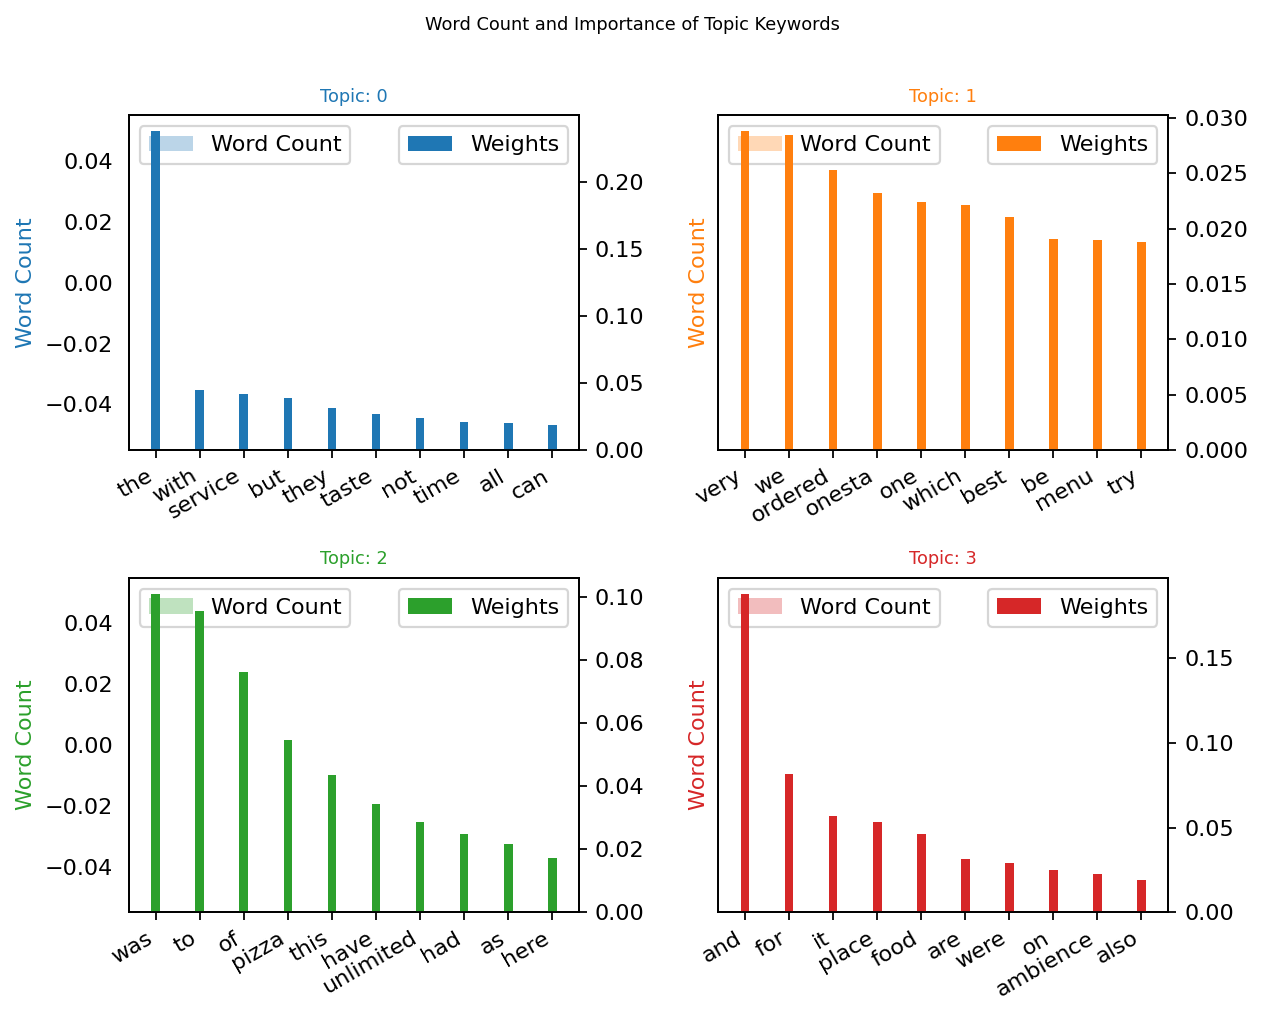

In [42]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
from nltk import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import gensim
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.colors as mcolors
rating_df['sent']=rating_df['rating'].apply(lambda x: 1 if int(x)>2.5 else 0)
stops=stopwords.words('english')
lem=WordNetLemmatizer()
corpus=' '.join(lem.lemmatize(x) for x in rating_df[rating_df['sent']==1]['review'][:3000] if x not in stops)
tokens=word_tokenize(corpus)
vect=TfidfVectorizer()
vect_fit=vect.fit(tokens)
id_map=dict((v,k) for k,v in vect.vocabulary_.items())
vectorized_data=vect_fit.transform(tokens)
gensim_corpus=gensim.matutils.Sparse2Corpus(vectorized_data,documents_columns=False)
ldamodel = gensim.models.ldamodel.LdaModel(gensim_corpus,id2word=id_map,num_topics=5,random_state=34,passes=25)
counter=Counter(corpus)
out=[]
topics=ldamodel.show_topics(formatted=False)
for i,topic in topics:
    for word,weight in topic:
        out.append([word,i,weight,counter[word]])
dataframe = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        
fig, axes = plt.subplots(2, 2, figsize=(8,6), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=dataframe.loc[dataframe.topic_id==i, :], color=cols[i], width=0.3, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=dataframe.loc[dataframe.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=8)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(dataframe.loc[dataframe.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')
fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=8, y=1.05)    
plt.show()

In [43]:
rating_df.shape

(16299, 4)

In [44]:
rating_df.info

<bound method DataFrame.info of                     name  rating  \
0                 Onesta     5.0   
1                 Onesta     5.0   
2                 Onesta     4.0   
3                 Onesta     3.0   
4                 Onesta     4.0   
...                  ...     ...   
16294  Five Star Chicken     3.5   
16295  Five Star Chicken     3.5   
16296  Five Star Chicken     3.5   
16297  Five Star Chicken     4.5   
16298  Five Star Chicken     1.0   

                                                  review  sent  
0      I personally really liked this place  The ambi...     1  
1      Very good pizza took unlimited pizza and could...     1  
2      Onward has been a favourite place for a Pizza ...     1  
3      Onesta serves unlimited pizza and desserts wit...     1  
4      I like going back to this place I really like ...     1  
...                                                  ...   ...  
16294  Food is nice but the location is not proper at...     1  
16295  A decent

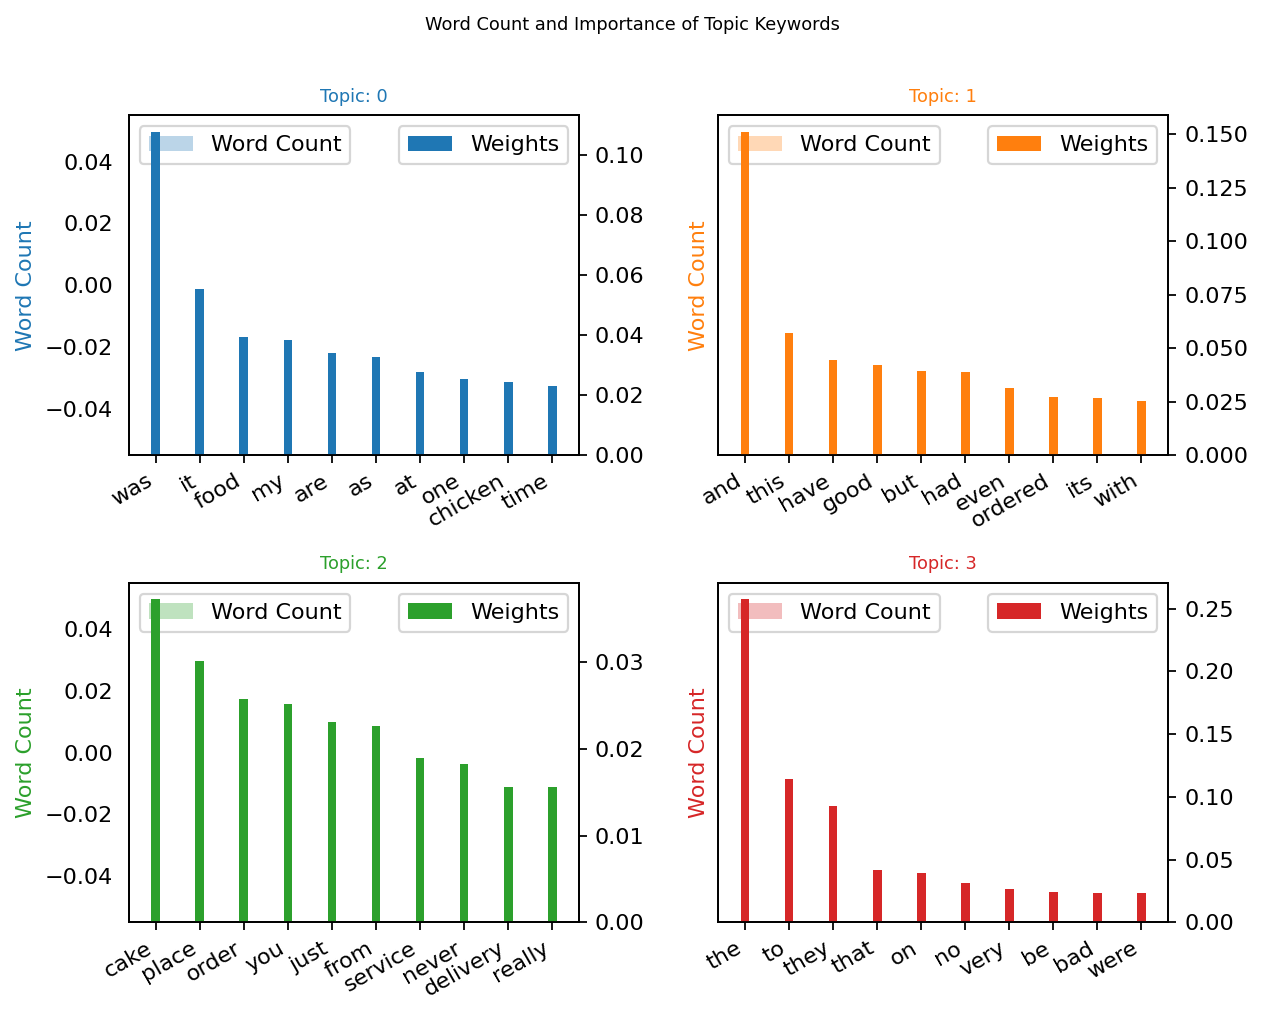

In [45]:
stops=stopwords.words('english')
lem=WordNetLemmatizer()
corpus=' '.join(lem.lemmatize(x) for x in rating_df[rating_df['sent']==0]['review'][:3000] if x not in stops)
tokens=word_tokenize(corpus)
vect=TfidfVectorizer()
vect_fit=vect.fit(tokens)
id_map=dict((v,k) for k,v in vect.vocabulary_.items())
vectorized_data=vect_fit.transform(tokens)
gensim_corpus=gensim.matutils.Sparse2Corpus(vectorized_data,documents_columns=False)
ldamodel = gensim.models.ldamodel.LdaModel(gensim_corpus,id2word=id_map,num_topics=5,random_state=34,passes=25)
counter=Counter(corpus)
out=[]
topics=ldamodel.show_topics(formatted=False)
for i,topic in topics:
    for word,weight in topic:
        out.append([word,i,weight,counter[word]])
dataframe = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        
fig, axes = plt.subplots(2, 2, figsize=(8,6), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=dataframe.loc[dataframe.topic_id==i, :], color=cols[i], width=0.3, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=dataframe.loc[dataframe.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=8)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(dataframe.loc[dataframe.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')
fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=8, y=1.05)    
plt.show()

In [46]:
rating_df['sent']=rating_df['rating'].apply(lambda x: 1 if int(x)>2.5 else 0)

In [47]:
df.shape

(389, 14)

In [48]:
rating_df.shape

(16299, 4)

In [49]:
rating_df.isnull().sum()

name      0
rating    0
review    0
sent      0
dtype: int64

In [50]:
resname = rating_df["name"].value_counts()
print(resname)

Onesta               7656
Empire Restaurant    4254
Five Star Chicken    2312
Cafe Coffee Day      1059
Just Bake            1018
Name: name, dtype: int64


**KNN, SVM and MLP Learning Algorithm**

In [51]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
max_features=3000
tokenizer=Tokenizer(num_words=max_features,split=' ')
tokenizer.fit_on_texts(rating_df['review'].values)
X = tokenizer.texts_to_sequences(rating_df['review'].values)
X = pad_sequences(X)
Y = rating_df['sent'].astype(int)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(10920, 182) (10920,)
(5379, 182) (5379,)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.977 total time=   3.8s
[CV 2/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.980 total time=   3.7s
[CV 3/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.981 total time=   3.4s
[CV 4/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.978 total time=   4.1s
[CV 5/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.970 total time=   3.5s
[CV 1/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.972 total time=   3.8s
[CV 2/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.974 total time=   4.0s
[CV 3/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.973 total time=   4.2s
[CV 4/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.970 total time=   3.7s
[CV 5/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.961 total time=   3.7s
[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.977 total time=   3.0s
[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;,

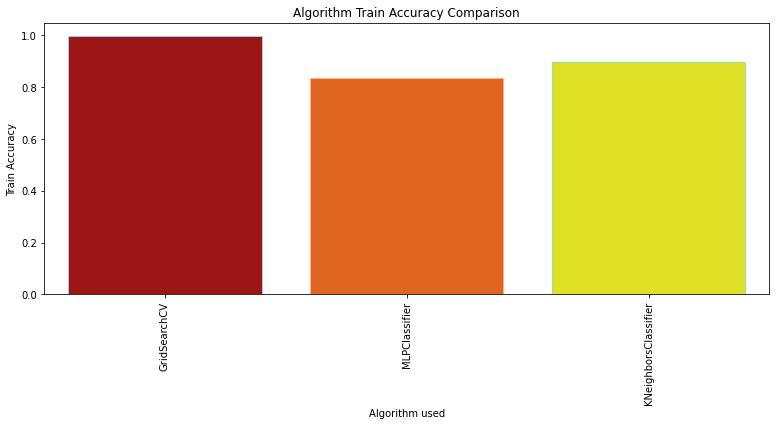

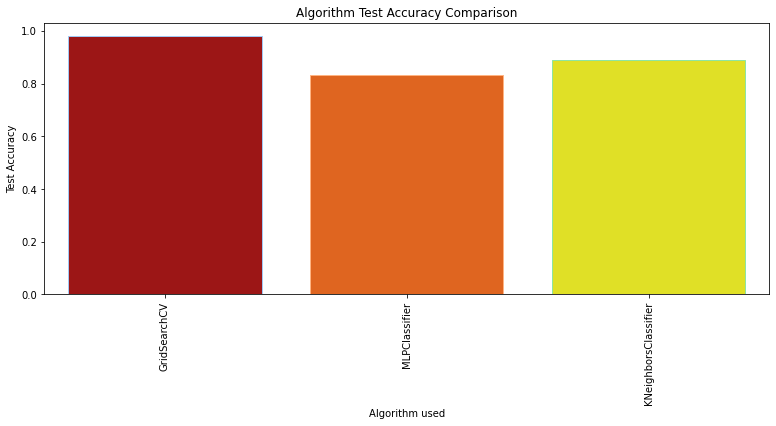

In [52]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
param_grid = {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],'kernel': ['rbf']} ,

AC = [
#SVM
GridSearchCV(SVC(), param_grid, refit = True, verbose = 3),
#MLP
MLPClassifier(hidden_layer_sizes=(22,42),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01),
#KNN
KNeighborsClassifier(n_neighbors=22),
]

AC_columns=[]
AC_compare=pd.DataFrame(columns=AC_columns)
row=0
for alg in AC:
  predicted = alg.fit(X_train, Y_train).predict(X_test)
  fp,tp,th=roc_curve(Y_test,predicted)
  AC_name=alg.__class__.__name__
  AC_compare.loc[row,'Algorithm used'] = AC_name
  AC_compare.loc[row, 'Train Accuracy'] = round(alg.score(X_train, Y_train), 4)
  AC_compare.loc[row, 'Test Accuracy'] = round(alg.score(X_test, Y_test), 4)
  row+=1
# Creating plot to show the train accuracy
plt.subplots(figsize=(13,5))
sns.barplot(x="Algorithm used", y="Train Accuracy",data=AC_compare,palette='hot',edgecolor=sns.color_palette('pastel',8))
plt.xticks(rotation=90)
plt.title('Algorithm Train Accuracy Comparison')
plt.show()
# Creating plot to show the test accuracy
plt.subplots(figsize=(13,5))
sns.barplot(x="Algorithm used", y="Test Accuracy",data=AC_compare,palette='hot',edgecolor=sns.color_palette('pastel',8))
plt.xticks(rotation=90)
plt.title('Algorithm Test Accuracy Comparison')
plt.show()

In [53]:
AC_compare.sort_values(by=['Test Accuracy'],ascending=False,inplace=True)
AC_compare

,Algorithm used,Train Accuracy,Test Accuracy
0,GridSearchCV,0.9995,0.9818
2,KNeighborsClassifier,0.8962,0.8886
1,MLPClassifier,0.8343,0.8312


**VADER REVIEW EMOTION RECOGNITION**

In [54]:
import spacy
import nltk

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [55]:
from nltk.tokenize import word_tokenize
nlp = spacy.load("en_core_web_sm")

In [56]:
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [57]:
newdf = rating_df
stop_words = nlp.Defaults.stop_words
def processing(text):
  tokenize= word_tokenize(text)
  removeStop= [word for word in tokenize if word not in stop_words]
  return ' '.join(removeStop)
newdf['stop_words_removed']=newdf['review'].apply(processing)
newdf['lemmatized']= newdf['stop_words_removed'].apply(lambda x: " ".join([y.lemma_ for y in nlp(x)]))

In [58]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [59]:
def vadfun(text):
  return(sid.polarity_scores(text)['compound'])
newdf['compound_score']=newdf['lemmatized'].apply(vadfun)
newdf['Predicted_Review_Type']=newdf['compound_score'].apply(lambda x: 'Positive' if(x>0.05) else('Negative'))

In [60]:
finaldf = newdf[['name', 'rating','review','Predicted_Review_Type']]

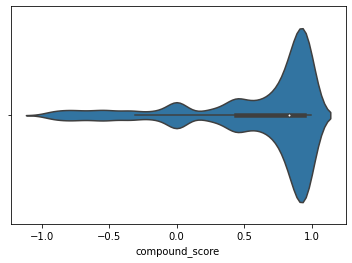

In [61]:
sns.violinplot(data=newdf, x="compound_score", hue="Predicted_Review_Type")

In [62]:
sentitype = newdf["Predicted_Review_Type"].value_counts()
print(sentitype)

Positive    13350
Negative     2949
Name: Predicted_Review_Type, dtype: int64


In [63]:
newdf.describe()

,rating,sent,compound_score
count,16299.000000,16299.000000,16299.000000
mean,3.567335,0.801583,0.585492
std,1.232420,0.398820,0.502360
min,1.000000,0.000000,-0.972000
25%,3.000000,1.000000,0.440400
50%,4.000000,1.000000,0.836000
75%,4.500000,1.000000,0.939800
max,5.000000,1.000000,0.993700


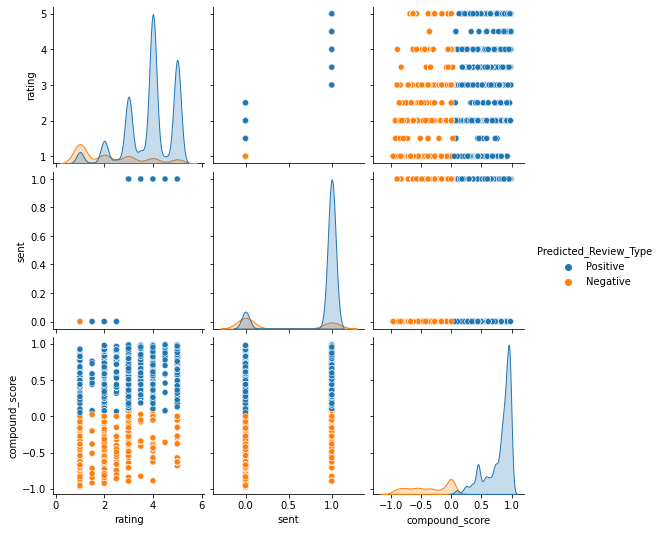

In [64]:
sns.pairplot(data=newdf, hue='Predicted_Review_Type')

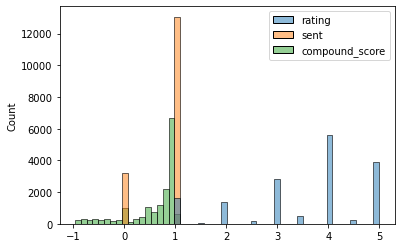

In [65]:
sns.histplot(data=newdf)

In [66]:
finaldf.head(50)

,name,rating,review,Predicted_Review_Type
0,Onesta,5.0,I personally really liked this place The ambi...,Positive
1,Onesta,5.0,Very good pizza took unlimited pizza and could...,Positive
2,Onesta,4.0,Onward has been a favourite place for a Pizza ...,Positive
3,Onesta,3.0,Onesta serves unlimited pizza and desserts wit...,Positive
4,Onesta,4.0,I like going back to this place I really like ...,Positive
5,Onesta,5.0,Bakasuras Paradise\n\nThe only place that can ...,Positive
6,Onesta,4.0,It is like any other onesta outlet But I find ...,Positive
7,Onesta,5.0,At times of a cafe bubble in Bangalore Onesta ...,Positive
8,Onesta,5.0,This is one of the biggest Onesta outlets Ive ...,Positive
9,Onesta,5.0,This roof top outlet of Onest is one of the a...,Positive
